# Data Exploration on Time Series Data for Forecasting and Anomaly Detection
Using dataset: Ref: https://fraud-detection-handbook.github.io/fraud-detection-handbook

In [ ]:
#TODO try to get better explanation of the problem statement and how you plan to solve it using good data


In [5]:
import utils
import configs.base_config as C
import seaborn as sns

data = utils.read_from_files(C.DATA_DIR + 'simulated-data-raw/data/', "2018-04-01", "2018-08-31")


d:\Projects\AIPracticeProjects\ml-project\utils.py:249: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final = df_final.replace([-1], 0).infer_objects(copy=False)


In [2]:
data


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0
...,...,...,...,...,...,...,...,...,...
1466277,1466277,2018-08-31 23:54:02,2696,9384,86.91,13218842,152,0,0
1466278,1466278,2018-08-31 23:55:08,2670,9778,34.89,13218908,152,0,0
1466279,1466279,2018-08-31 23:55:38,1055,7560,80.38,13218938,152,0,0
1466280,1466280,2018-08-31 23:56:57,4141,8796,49.97,13219017,152,0,0


In [3]:
frauds = data["TX_FRAUD"].sum() / data["TX_FRAUD"].count()

print(f"{(frauds * 100):0.2f}% transactions are fradulent in dataset/")


0.83% transactions are fradulent in dataset/


In [7]:
one_month_data = data[data.TX_DATETIME <= "2018-5-01"]


<Axes: xlabel='TX_DATETIME', ylabel='TX_AMOUNT'>

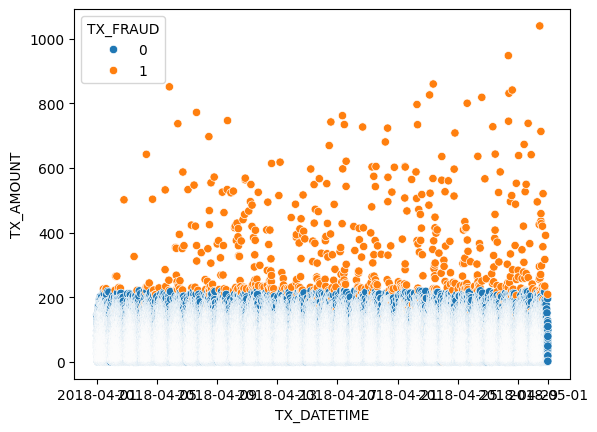

In [18]:
sns.scatterplot(one_month_data, x="TX_DATETIME", y="TX_AMOUNT", hue="TX_FRAUD")


In [21]:
one_month_data


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0
...,...,...,...,...,...,...,...,...,...
288057,288057,2018-04-30 23:56:58,818,7690,48.92,2591818,29,0,0
288058,288058,2018-04-30 23:57:38,3763,7460,99.06,2591858,29,0,0
288059,288059,2018-04-30 23:57:39,2000,8998,83.24,2591859,29,0,0
288060,288060,2018-04-30 23:58:01,2566,6688,109.55,2591881,29,0,0


In [29]:
one_month_data[(one_month_data.CUSTOMER_ID == 3416)]


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
1327,1327,2018-04-01 06:21:03,3416,9860,56.68,22863,0,0,0
1834,1834,2018-04-01 07:27:10,3416,8816,75.67,26830,0,0,0
5250,5250,2018-04-01 12:42:57,3416,763,84.91,45777,0,0,0
6557,6557,2018-04-01 14:42:35,3416,5719,64.00,52955,0,0,0
9111,9111,2018-04-01 20:47:20,3416,1370,87.44,74840,0,0,0
...,...,...,...,...,...,...,...,...,...
279765,279765,2018-04-30 06:25:30,3416,4047,52.86,2528730,29,0,0
280315,280315,2018-04-30 07:32:27,3416,263,122.03,2532747,29,0,0
285606,285606,2018-04-30 15:35:37,3416,8816,126.27,2561737,29,0,0
287660,287660,2018-04-30 21:00:30,3416,8816,101.65,2581230,29,0,0


In [33]:
one_month_data[(one_month_data.TERMINAL_ID == 898)]


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
19200,19200,2018-04-03 01:20:37,4672,898,46.44,177637,2,1,2
53794,53794,2018-04-06 13:28:25,1831,898,8.77,480505,5,1,2
58546,58546,2018-04-07 05:24:33,1938,898,64.25,537873,6,1,2
73221,73221,2018-04-08 14:15:35,1808,898,52.59,656135,7,1,2
84921,84921,2018-04-09 18:01:09,3401,898,82.08,756069,8,1,2
85173,85173,2018-04-09 18:42:36,3368,898,25.24,758556,8,1,2
96159,96159,2018-04-11 03:02:54,3493,898,25.00,874974,10,1,2
110011,110011,2018-04-12 11:45:24,2769,898,68.01,992724,11,1,2
148750,148750,2018-04-16 12:18:02,3368,898,21.40,1340282,15,1,2
159983,159983,2018-04-17 14:48:35,3401,898,63.84,1435715,16,1,2
